# Homework 12

## Due Nov 28th, 4PM EST, 2021

Fill in your name

In [2]:
first_name = "Roxanne"
last_name = "Saewong"
nick_name = "Roxy"

assert(len(first_name) != 0), "First name is missing"
assert(len(last_name)  != 0), "Last name is missing"
assert(len(nick_name)  != 0), "Nickname is missing"

# 1) WiFi in Boston

The file wifi.csv lists municipal wifi networks in Boston. Plot the location of the networks listed using Latitude and Longitude.

In [3]:
import plotly.express as px
import pandas as pd
import os 


## Use Pandas to read in data 
df = pd.read_csv(f"{os.getcwd()}\..\data\wifi.csv", header=0)
## Unify the headers 
df.columns = df.columns.str.lower()
# print(df.head())

def plot_scatter(df):
    ## Ref.: https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo 
    fig = px.scatter_geo(df, lat='latitude', lon='longitude', hover_name='address', width=800)
    ## Ref.: https://plotly.com/python/map-configuration/
    ## Ref.: https://plotly.com/python/reference/layout/geo/
    # update_geos(center=dict(lon=-71.1, lat=42.32))
    fig.update_geos(fitbounds='locations', scope='usa', showcountries=True, countrycolor='Black', showsubunits=True, subunitcolor='#008080')
    ## Ref.: https://plotly.com/python/reference/layout/
    fig.update_layout(title={'pad':{'r':10, 't':10, 'l':10, 'b':10}, 'text':'Boston Wi-fi', 'x':0.5, 'y':1}, 
        autosize=True, margin={'r':20, 't':20, 'l':20, 'b':20})
    fig.show()


plot_scatter(df)

# 2) Which towns have the most Wifi?

Create a horizontal bar chart showing the number of Wifi networks listed for each town listed.

List the towns as 'Dorchester', rather than 'Dorchester, MA'.

The address field may need grooming. 

86 ['Boston', 'Dorchester', 'East Boston', 'Boston', 'Dorchester', 'Boston', 'South Boston', 'Hyde Park', 'South Boston', 'Hyde Park', 'Roxbury', 'Roxbury', 'South Boston', 'Roxbury', 'East Boston', 'Roslindale', 'Roxbury', 'Roxbury', 'Roxbury', 'Dorchester', 'Roxbury', 'Jamaica Plain', 'East Boston', 'Roxbury', 'East Boston', 'Charlestown', 'Roxbury', 'Brighton', 'Hyde Park', 'Hyde Park', 'Roxbury', 'Roxbury', 'East Boston', 'Roxbury', 'Roxbury', 'Roxbury', 'Hyde Park', 'Dorchester', 'South Boston', 'Allston', 'Dorchester', 'Dorchester', 'Roxbury', 'Hyde Park', 'Roslindale', 'Brighton', 'Allston', 'Roxbury', 'Dorchester', 'Jamaica Plain', 'Jamaica Plain', 'Roslindale', 'Roxbury', 'Hyde Park', 'Dorchester', 'Dorchester', 'Roxbury', 'Roxbury', 'East Boston', 'South Boston', 'Jamaica Plain', 'Jamaica Plain', 'Roxbury', 'Dorchester', 'Roxbury', 'Roxbury', 'Dorchester', 'Dorchester', 'Roxbury', 'South Boston', 'Dorchester', 'Boston', 'Roxbury', 'Boston', 'Roxbury', 'Roxbury', 'Boston', 'So

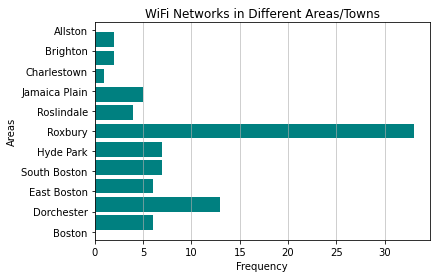

In [4]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import re


def plot_histogram(df):
    """This function plots a bar histogram showing WiFi networks per town."""
    ## Data cleaning 
    addresses = df['address'].tolist()
    addresses = [ad.replace(', MA', '').replace(' MA', '').rsplit(',', 1) for ad in addresses]
    addresses = [re.sub(' +', ' ', ad[-1].strip()) for ad in addresses]
    print(len(addresses), addresses)
    df['town'] = pd.DataFrame(addresses)
    # print(df.head())

    ## Plotting 
    ## Ref.: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
    plt.hist(df['town'], bins=len(df['town'].unique()), histtype='bar', align='mid', orientation='horizontal', rwidth=0.8, color='#008080')
    plt.grid(axis='x', alpha=0.75)
    plt.title('WiFi Networks in Different Areas/Towns')
    plt.xlabel('Frequency')
    plt.ylabel('Areas')
    plt.show()


plot_histogram(df)

# 3) Sorting Employees

We wish to take an unordered list of Employees, and get a list sorted by Company and Id.

Everyone who works at 'Springfield Department of Motor Vehicles' should be in one group. 
Everyone who works at 'Springfield Nuclear Power' would be in another group, later in the list, 
and everyone who works from the Mafia would be in a group earlier in the list. 
Within each group, we want to see the low ID numbers before this high ones.

For this problem, we do not want you to write a sorting program. You will use Python's sort.   
You need to define the magic method dunder lt() for the class Employee. 
Once that is done, calling Python's sorted() on a list of Employees will return a sorted list.

### Add to the cell below.  

In [5]:
class Person:

    def __init__(self, first, last):
        self.firstname = first.capitalize()
        self.lastname = last.capitalize()

    def __str__(self):
        return f"{self.firstname} {self.lastname}" 

class Employee(Person):

    def __init__(self, first, last, company, id):
        ## Call the superclass to set common information
        super().__init__(first, last)
        self.id = id
        self.company = company

    def __str__(self):
        ## Call the superclass to display common information
        return f"{super().__str__()}, {str(self.id)} at {self.company}"

    ## Ref.: https://docs.python.org/3/library/operator.html
    ## Ref.: https://docs.python.org/3/reference/datamodel.html#customization    
    def __lt__(self, other): 
        ## Ref.: https://www.geeksforgeeks.org/sorting-objects-of-user-defined-class-in-python/
        return (self.company, self.id) < (other.company, other.id)

## Unit Test

In [6]:
lst = [
    Employee('Homer', 'Simpson', 'Springfield Nuclear Power', 1005),
    Employee('Barney', 'Gumble', 'Plow King', 1),
    Employee('Clancy', 'Wiggum', 'Police Department', 1),
    Employee('Edna', 'Krabapple', 'Springfield Elementary School', 39),
    Employee('Seymour', 'Skinner', 'Springfield Elementary School', 1),
    Employee('Charles', 'Burns', 'Springfield Nuclear Power', 1),
    Employee('Waylon', 'Smithers', 'Springfield Nuclear Power', 2),
    Employee('Patty', 'Bouvier', 'Springfield Department of Motor Vehicles', 39),
    Employee('Selma', 'Bouvier', 'Springfield Department of Motor Vehicles', 38),
    Employee('Robert', 'Terwilliger', 'Channel 6', 31),
    Employee('Herschel', 'Krustofsky', 'Channel 6', 2),
    Employee('Lois', 'Pennycandy', 'Channel 6', 46),
    Employee('Johnny', 'Cevasco', 'Mafia', 2),
    Employee('Fat', 'Tony', 'Mafia', 1),
    Employee('Max', 'Legman', 'Mafia', 3 ),
    Employee('Louie', 'Walters', 'Mafia', 4)
    ]

for emp in lst:
    print(emp)
    
print('='*100)

# Sort the people
lst = sorted(lst)

# Check that the list is sorted
for first, second in zip(lst[:-1], lst[1:]):
    assert (first.company, first.id) < (second.company, second.id)

for emp in lst:
    print(emp)

print("Success!")

Homer Simpson, 1005 at Springfield Nuclear Power
Barney Gumble, 1 at Plow King
Clancy Wiggum, 1 at Police Department
Edna Krabapple, 39 at Springfield Elementary School
Seymour Skinner, 1 at Springfield Elementary School
Charles Burns, 1 at Springfield Nuclear Power
Waylon Smithers, 2 at Springfield Nuclear Power
Patty Bouvier, 39 at Springfield Department of Motor Vehicles
Selma Bouvier, 38 at Springfield Department of Motor Vehicles
Robert Terwilliger, 31 at Channel 6
Herschel Krustofsky, 2 at Channel 6
Lois Pennycandy, 46 at Channel 6
Johnny Cevasco, 2 at Mafia
Fat Tony, 1 at Mafia
Max Legman, 3 at Mafia
Louie Walters, 4 at Mafia
Herschel Krustofsky, 2 at Channel 6
Robert Terwilliger, 31 at Channel 6
Lois Pennycandy, 46 at Channel 6
Fat Tony, 1 at Mafia
Johnny Cevasco, 2 at Mafia
Max Legman, 3 at Mafia
Louie Walters, 4 at Mafia
Barney Gumble, 1 at Plow King
Clancy Wiggum, 1 at Police Department
Selma Bouvier, 38 at Springfield Department of Motor Vehicles
Patty Bouvier, 39 at Spring

# 4) Phone Numbers

The "North American Numbering Plan" (NANP) is a telephone numbering system used by many countries in North America. All NANP-countries share the same international country code: `1`.

You are to create a class that takes a string and returns an object holding a valid NANP phone number.  

NANP numbers are ten-digit numbers consisting of a three-digit area code and a seven-digit local number. The first three digits of the local number are the "exchange code", and the four-digit number which follows is the "subscriber number".

The format is usually represented as (NXX)-NXX-XXXX where `N` is any digit from 2 through 9 and `X` is any digit from 0 through 9.

Your task is to clean up differently formatted telephone numbers by removing punctuation and the country code (1) if present.  

For example, the strings below 

```python
    +1 (617) 495-4024

    617-495-4024

    1 617 495 4024

    617.495.4024
```

should all produce an object that is printed as (617) 495-4024

## ValueErrors

If you are asked to create a phone number that does not meet the pattern above, you should throw a ValueError with a string explaining the problem.  We run through 5 different problems below: each should generate a different error message.    

For example, for the third string below, you might say:

```python
     raise ValueError(f'Invalid Country Code: {code}')
```

### Here are the 5 errors should be able to catch

```python
    +1 (617) 495-40247 has too many digits

    (617) 495-402 has too few digits

    +2 (617) 495-4024 has the wrong country code, 2

    (017) 495-4024 has an illegal area code, 017

    (617) 195-4024 has an illegal exchange code, 195
```

In [7]:
class Phone(object):
    """A NANP phone number"""
    
    def __init__(self, phone_number: str):
        self.phone_number = phone_number
        
    def __str__(self) -> str: 
        return f"{self.phone_number}" 

## Unit Tests

In [8]:
def test_phone_numbers():
    number = Phone("(223) 456-7890")
    assert number.__str__() == "(223) 456-7890"

    # Valid NANP Phone numbers
    assert Phone("+1 (617) 495-4024").__str__() == "(617) 495-4024"
    assert Phone("617-495-4024").__str__() == "(617) 495-4024"
    assert Phone("1 617 495 4024").__str__() == "(617) 495-4024"
    assert Phone("617.495.4024").__str__() == "(617) 495-4024"
    assert Phone("6174954024").__str__() == "(617) 495-4024"

    print('Success!')

test_phone_numbers()

AssertionError: 

## Unit Tests of your Exceptions

In [ ]:
def test_phone_errors():

    # Illegal NANP numbers: You should raise a ValueError Exception
    try:
        number = Phone("+1 (617) 495-40247")
        assert(1 == 0)    # Should not get here
    except ValueError:
        pass

    try:
        number = Phone("(617) 495-402")
        assert(1 == 0)    # Should not get here
    except ValueError:
        pass

    try:
        number = Phone("+2 (617) 495-4024")
        assert(1 == 0)    # Should not get here
    except ValueError:
        pass

    try:
        number = Phone("(017) 495-4024")
        assert(1 == 0)    # Should not get here
    except ValueError:
        pass

    try:
        number = Phone("(617) 195-4024")
        assert(1 == 0)    # Should not get here
    except ValueError:
        pass

    print("Success!")

test_phone_errors()

## Show us your exception messages
There should be different messages for each different error

In [ ]:
number = Phone("+1 (617) 495-40247")

In [ ]:
number = Phone("(617) 495-402")

In [ ]:
number = Phone("+2 (617) 495-4024")

In [ ]:
number = Phone("(017) 495-4024")

In [ ]:
number = Phone("(617) 195-4024")

# Post Mortem
## How long did it take you to solve this problem set?
## Did anything confuse you or cause difficulty?

In [ ]:
# Two entire days 